 <font size=6> **实验7 集成学习与SVM(1)**</font>

- 理解集成学习的基本思想和类型；
- 理解装袋法的算法思想，掌握RandomForest的基本用法；
- 理解提升法的算法思想，掌握AdaBoost、XGBoost和LightGBM的基本用法；
- 理解SVM算法的基本原理，包括算法的目标、是否线性可分、超平面定义与公式的建立，算法求解。



**题目：**  
请先安装好XGBoost和LightGBM库，通过如下加载红酒数据集：  
from sklearn.datasets import load_wine  
wine = load_wine()  
wine.data为数据，wine.target为标签。若将数据集拆分为0.7、0.3的训练集、测试集，要求分别建立单棵决策树、随机森林、逻辑回归、K近邻、高斯贝叶斯、AdaBoost、XGBoost、LightGBM分类器，请编程完成如下任务：  
(1)输出各分类在测试集中的准确度    
(2)对整个数据集按10折交叉验证方式求出平均准确率，输出上述分类器在10次10折交叉验证情况下平均准确率图形  

In [12]:
# 安装XGBoost和LightGBM库
!pip install xgboost -i https://pypi.tuna.tsinghua.edu.cn/simple
!pip install lightgbm  -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


# 导入库

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# 数据处理

## 数据获取

In [14]:
wine = load_wine()
X = wine['data']
y = wine['target']

# 建模  


## 拆分数据集

In [15]:
X_train, X_test, y_train, y_test = train_test_split = train_test_split(X, y, test_size=0.3, random_state=42)

## 建模并输出准确率

In [22]:
models = [
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("Logistic Regression", LogisticRegression()),
    ("K-Nearest Neighbors", KNeighborsClassifier()),
    ("Gaussian Naive Bayes", GaussianNB()),
    ("AdaBoost", AdaBoostClassifier()),
    ("XGBoost", XGBClassifier()),
    ("LightGBM", LGBMClassifier()),
]

model_results = {}
for name, model in models:
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    model_results[name] = {"score": score}

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000066 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 453
[LightGBM] [Info] Number of data points in the train set: 124, number of used features: 13
[LightGBM] [Info] Start training from score -1.131402
[LightGBM] [Info] Start training from score -0.908259
[LightGBM] [Info] Start training from score -1.293921
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

## 可视化结果

In [23]:
dt_1 = []
rf_1 = []
knn_1 = []
nb_1 = []
ada_1 = []
xgb_1 = []
lgb_1 = []

for _ in range(10):

    dt = DecisionTreeClassifier()
    dt.fit(X_train, y_train)
    dt_1.append(cross_val_score(dt, X, y, cv=10).mean())

    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    rf_1.append(cross_val_score(rf, X, y, cv=10).mean())

    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    knn_1.append(cross_val_score(knn, X, y, cv=10).mean())

    nb = GaussianNB()
    nb.fit(X_train, y_train)
    nb_1.append(cross_val_score(nb, X, y, cv=10).mean())

    ada = AdaBoostClassifier()
    ada.fit(X_train, y_train)
    ada_1.append(cross_val_score(ada, X, y, cv=10).mean())

    xgb = XGBClassifier()
    xgb.fit(X_train, y_train)
    xgb_1.append(cross_val_score(xgb, X, y, cv=10).mean())

    lgb = LGBMClassifier()
    lgb.fit(X_train, y_train)
    lgb_1.append(cross_val_score(lgb, X, y, cv=10).mean())



Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

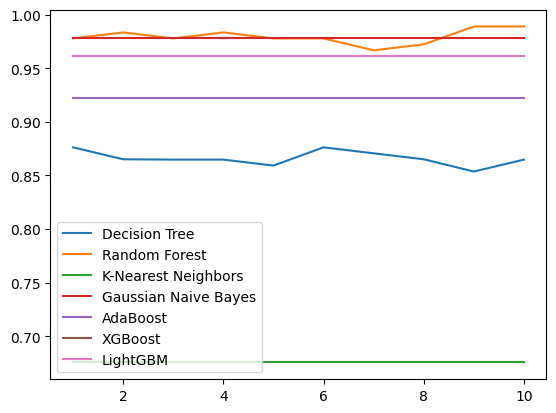

In [24]:
plt.plot(range(1,11), dt_1, label='Decision Tree')
plt.plot(range(1,11), rf_1, label='Random Forest')
plt.plot(range(1,11), knn_1, label='K-Nearest Neighbors')
plt.plot(range(1,11), nb_1, label='Gaussian Naive Bayes')
plt.plot(range(1,11), ada_1, label='AdaBoost')
plt.plot(range(1,11), xgb_1, label='XGBoost')
plt.plot(range(1,11), lgb_1, label='LightGBM')

plt.legend()
plt.show()